In [1]:
""" Notebook to remake our mollweide plots OCs and GCs plotted over OpSim fields colored by nobs in that field"""

' Notebook to remake our mollweide plots OCs and GCs plotted over OpSim fields colored by nobs in that field'

In [2]:
# importing needed packages
import pandas as pd
import numpy as np
from astropy.coordinates import Angle, SkyCoord
import astropy.units as u
from OpSim import OpSim
from TRILEGAL import TRILEGAL

from matplotlib import pyplot as plt

from vespa_update import trilegal
import os
p = os.environ['PATH']
pv = os.path.join(os.getcwd(),'vespa_update')
p2 = pv+':'+p
os.environ['PATH'] = p2

import sys
sys.path.insert(0, '/Users/ageller/WORK/LSST/onGitHub/EBLSST/code')



In [3]:
# File names
OCnames = ['ID','RA[hr]','Dec[deg]','dist[pc]','rhm[pc]','mass[Msun]',
'age[Myr]','[Fe/H]','sigma_v0_z[km/s]','OpSimID','OpSimRA[deg]','OpSimDec[deg]']

GCnames = ['ID','RA[hr]','Dec[deg]','dist[pc]','rhm[pc]','mass[Msun]',
'age[Myr]','[Fe/H]','sigma_v0_z[km/s]','OpSimID','OpSimRA[deg]','OpSimDec[deg]']

In [4]:
# Reading in GC/OC files for 
path = '/Users/andrewbowen/ceb_project/data/'
OCs = pd.read_csv(path + 'OC_data/OCdataForEBLSST.csv', sep = ',', header = 0, names = OCnames)
GCs = pd.read_csv(path + 'GC_data/GCdataForEBLSST.csv', sep = ',', header = 0, names = GCnames)

FileNotFoundError: [Errno 2] File b'/Users/andrewbowen/ceb_project/data/OC_data/OCdataForEBLSST.csv' does not exist: b'/Users/andrewbowen/ceb_project/data/OC_data/OCdataForEBLSST.csv'

In [9]:
# Getting OpSim field data and Nobs for each field
OpS = OpSim()
OpS.dbFile = '/Users/andrewbowen/baseline2018a.db'
OpS.getAllOpSimFields()

getting OpSim fields...
have summary cursor.
have field cursor.
returned 5292 fields


In [11]:
# Checking cums of masses for OCs/GCs
oc_mass = OCs['mass[Msun]']
# print(oc_mass)
ocMass = oc_mass.loc[np.isnan(oc_mass)]
oc_mass.loc[np.isnan(oc_mass)] = np.mean(OCs['mass[Msun]'].loc[OCs['mass[Msun]']!= np.nan])
print(oc_mass)

NameError: name 'OCs' is not defined

In [5]:
gc_mass = GCs['mass[Msun]']
gcTotalMass = np.sum(gc_mass)
ocTotalMass = np.sum(oc_mass)

print(f'The total mass of GCs:', gcTotalMass )
print(f'The total mass of OCs:',ocTotalMass)

NameError: name 'GCs' is not defined

In [6]:
# OC RA - converting from hours to degrees
ocRA_h = OCs['RA[hr]']
ocRA_h = Angle(ocRA_h, unit = u.hour)
ocRA = ocRA_h.degree#converting to degrees

# OC Dec
ocDec = OCs['Dec[deg]']
ocDec = Angle(ocDec, unit = u.degree)
# ocDec
# GC RA
gcRA_h = GCs['RA[hr]']

gcRA_h = Angle(gcRA_h, unit = u.hour)
gcRA = gcRA_h.degree

# GC Dec
gcDec = Angle(GCs['Dec[deg]'], unit = u.degree)


NameError: name 'OCs' is not defined

In [7]:
# Converting half-mass radii to arcmin - GCs first

gc_rad_pc = GCs['rhm[pc]'].values * u.pc


# Converting distances from kpc to pc (for now)
gc_dist = GCs['dist[pc]'].values *u.pc
# gc_dist = gc_dist.to(u.parsec)

# GC radius in radians - need to convert to degrees
gc_rad_r = np.arctan(gc_rad_pc/gc_dist)#linear size from core-radius param (small-angle approx)

gcRad = gc_rad_r.to(u.degree)

# Open Cluster radius conversion
oc_rad_pc = OCs['rhm[pc]'].values * u.pc


# Converting distances from kpc to pc (for now)
oc_dist = OCs['dist[pc]'].values * u.pc
# oc_dist = oc_dist.to(u.parsec)

# GC radius in radians - need to convert to degrees
oc_rad_r = np.arctan(oc_rad_pc/oc_dist)#linear size from core-radius param (small-angle approx)

ocRad = oc_rad_r.to(u.degree)
print(ocRad)


NameError: name 'GCs' is not defined

In [13]:
# Setting up coords for OCs/GCs
ocCoords = SkyCoord(ocRA, ocDec,  unit=(u.degree, u.degree), frame='icrs')
gcCoords = SkyCoord(gcRA, gcDec,  unit=(u.degree, u.degree), frame='icrs')


NameError: name 'ocRA' is not defined

In [14]:
# OpSim Coords
coords = SkyCoord(OpS.RA, OpS.Dec, unit=(u.degree, u.degree),frame='icrs')

In [15]:
# OpSim field size
fieldRad = Angle(1.75, unit = u.degree)

In [ ]:
# Code from Aaron's script
raGal = coords.icrs.ra.wrap_at(180.*u.degree).degree
decGal = coords.icrs.dec.wrap_at(180.*u.degree).degree
lGal = coords.galactic.l.wrap_at(180.*u.degree).degree
bGal = coords.galactic.b.wrap_at(180.*u.degree).degree

f, ax = plt.subplots(figsize = (8,5), subplot_kw={'projection': "mollweide"})
ax.grid(True)
ax.set_xlabel(r"$RA$",fontsize=16)
ax.set_ylabel(r"$Dec$",fontsize=16)
xx = np.where(OpS.Nobs > 0)
ax.scatter(raGal[xx]*np.pi/180.,decGal[xx]*np.pi/180., s = fieldRad, c=OpS.Nobs[xx], 
           cmap='tab10', alpha = 1, vmin=0, vmax=1000)
ax.set_title('Baseline', fontsize = 16)
f.savefig('/Users/andrewbowen/ClusterEclipsingBinaries/plots/mollweides/baseline_N_mollweide.pdf', bbox_inches = 'tight')

# Galactic coords - no need
# f, ax = plt.subplots(subplot_kw={'projection': "mollweide"})
# ax.grid(True)
# ax.set_xlabel(r"$l$",fontsize=16)
# ax.set_ylabel(r"$b$",fontsize=16)
# ax.scatter(lGal[xx]*np.pi/180.,bGal[xx]*np.pi/180., s = 0.5, c=OpS.Nobs[xx], cmap='tab10', alpha = 1, vmin=0, vmax=1000)



In [14]:
# Lets try to make our own colormap: https://matplotlib.org/3.1.0/tutorials/colors/colormap-manipulation.html
# Dali blue hexcode: #5687A6   -  RGB: 86, 135, 166

# Importing colormap stuff from matplotlib
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


In [15]:
# Creating colormap to match our poster background, otherwise use 'Blues'
colors = [(1, 1, 1),(86/256, 135/256, 166/256)]  # R -> G -> B
n_bins = [100]  # Discretizes the interpolation into bins
cmap_name = 'Dali Blue'

for n_bin in n_bins:
    # Create the colormap
    cm = LinearSegmentedColormap.from_list(
        cmap_name, colors, N=n_bin)
DaliBlue = cm


In [16]:
# Dali Beige colormap
colors = [(1, 1, 1),(191/256, 138/256, 38/256)]  # R -> G -> B
n_bins = [100]  # Discretizes the interpolation into bins
cmap_name = 'Dali Biege'

for n_bin in n_bins:
    # Create the colormap
    cm = LinearSegmentedColormap.from_list(
        cmap_name, colors, N=n_bin)
DaliBeige = cm



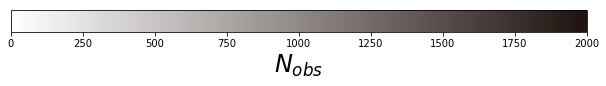

In [17]:
# Dali Dark Grey colormap
colors = [(1, 1, 1),(32/256, 20/256, 16/256)]  # R -> G -> B
n_bins = [100]  # Discretizes the interpolation into bins
cmap_name = 'Dali Brown'

for n_bin in n_bins:
    # Create the colormap
    cm = LinearSegmentedColormap.from_list(
        cmap_name, colors, N=n_bin)
DaliBrown = cm

# Making just the color bar
a = np.array([[0,2000]])
plt.figure(figsize=(10,0.5))
img = plt.imshow(a, cmap=DaliBrown)
plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.2, 0.8, 0.6])
plt.colorbar(cax=cax, orientation = 'horizontal')
plt.xlabel(r'$N_{obs}$', fontsize = 24)
plt.savefig('/Users/andrewbowen/ceb_project/poster/dali-brown-colorbar.pdf', bbox_inches='tight')

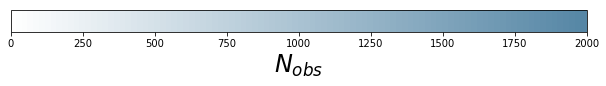

In [18]:
# Making just the color bar
a = np.array([[0,2000]])
plt.figure(figsize=(10,0.5))
img = plt.imshow(a, cmap=DaliBlue)
plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.2, 0.8, 0.6])
plt.colorbar(cax=cax, orientation = 'horizontal')
plt.xlabel(r'$N_{obs}$', fontsize = 24)
plt.savefig('/Users/andrewbowen/ceb_project/poster/dali-blue-colorbar.pdf', bbox_inches='tight')

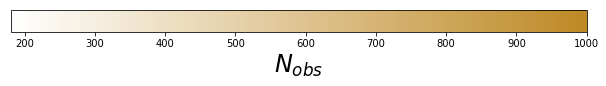

In [19]:
# Making just the color bar
a = np.array([[180,1000]])
plt.figure(figsize=(10,0.5))
img = plt.imshow(a, cmap=DaliBeige)
plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.2, 0.8, 0.6])
plt.colorbar(cax=cax, orientation = 'horizontal')
plt.xlabel(r'$N_{obs}$', fontsize = 24)
plt.savefig('/Users/andrewbowen/ceb_project/poster/dali-beige-colorbar.pdf', bbox_inches='tight')

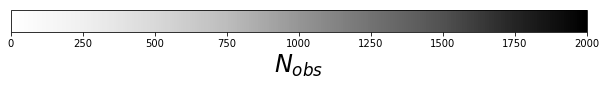

In [20]:
# Greys colorbar
# Making just the color bar
a = np.array([[0,2000]])
plt.figure(figsize=(10,0.5))
img = plt.imshow(a, cmap='Greys')
plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.2, 0.8, 0.6])
plt.colorbar(cax=cax, orientation = 'horizontal')
plt.xlabel(r'$N_{obs}$', fontsize = 24)
plt.savefig('/Users/andrewbowen/ceb_project/poster/greys-colorbar.pdf', bbox_inches='tight')

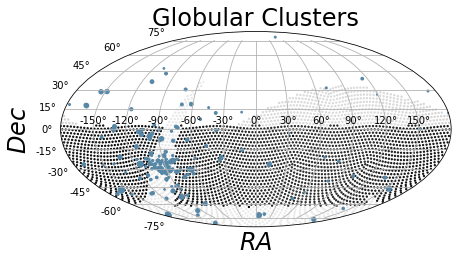

In [21]:
# Globular cluster mollweide
f, ax = plt.subplots(figsize = (7,8), subplot_kw={'projection': "mollweide"})
ax.grid(True)
ax.set_xlabel(r"$RA$",fontsize=24)
ax.set_ylabel(r"$Dec$",fontsize=24)
ax.set_title('Globular Clusters',fontsize=24)
xx = np.where(OpS.Nobs > 0)
# OpSim scatter
scat = ax.scatter(raGal[xx]*np.pi/180.,decGal[xx]*np.pi/180., s = fieldRad, \
           c=OpS.Nobs[xx], cmap='Greys', vmin=0, vmax=1000)
# GC coords scatter
ax.scatter((gcCoords.ra).wrap_at(180.*u.degree).radian, \
            gcCoords.dec.radian, s=500 * gcRad, c = '#5687A6')

# Setting up color bar - only want one because it looks weird if the 3 plots have colorbars
# clb = f.colorbar(scat,ax = ax, shrink = 0.75) #color bar
# clb.set_label(r'$N_{obs}$', fontsize = 18, rotation = 270, labelpad = 12) #label for color bar
plt.savefig('/Users/andrewbowen/ceb_project/plots/gc-opsim-mollweide.pdf', bbox_inches='tight')

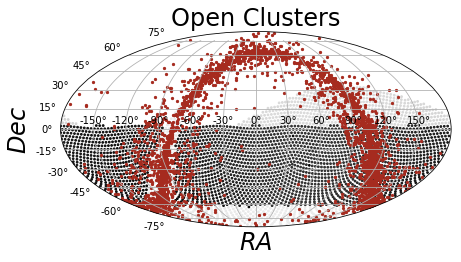

In [22]:
# Open cluster mollweide
f, ax = plt.subplots(figsize = (7,8), subplot_kw={'projection': "mollweide"})
ax.grid(True)
ax.set_xlabel(r"$RA$",fontsize=24)
ax.set_ylabel(r"$Dec$",fontsize=24)
ax.set_title('Open Clusters',fontsize=24)
xx = np.where(OpS.Nobs > 0)
# OpSim scatter
ax.scatter(raGal[xx]*np.pi/180.,decGal[xx]*np.pi/180., s = 3, \
           c=OpS.Nobs[xx], cmap='Greys', vmin=0, vmax=1000)
# GC coords scatter
plt.scatter((ocCoords.ra).wrap_at(180.*u.degree).radian, \
            ocCoords.dec.radian, s=5, c = '#A62B1F')
plt.savefig('/Users/andrewbowen/ceb_project/plots/oc-opsim-mollweide.pdf', bbox_inches='tight')

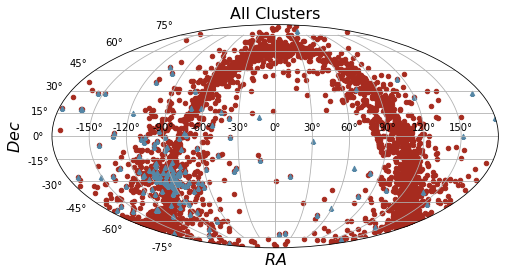

In [34]:
# Mollweide plot of both OCs and GCs 
f, ax = plt.subplots(figsize = (8,5),subplot_kw={'projection': "mollweide"})
ax.grid(True)
ax.set_xlabel(r"$RA$",fontsize=16)
ax.set_ylabel(r"$Dec$",fontsize=16)
ax.set_title('All Clusters',fontsize=16)
xx = np.where(OpS.Nobs > 0)
# OpSim scatter
# ax.scatter(raGal[xx]*np.pi/180.,decGal[xx]*np.pi/180., s = 3, \
#            c=OpS.Nobs[xx], cmap='Greys', vmin=0, vmax=1000)
# OC coords scatter
ax.scatter((ocCoords.ra).wrap_at(180.*u.degree).radian, \
            ocCoords.dec.radian, s=20, c = '#A62B1F', marker = 'o',label = 'Open Clusters')
# GC coords scatter
ax.scatter((gcCoords.ra).wrap_at(180.*u.degree).radian, \
            gcCoords.dec.radian, s=20, c = '#5687A6',  marker = '^',label = 'Globular Clusters')

# ax.legend(loc = 'upper right')

plt.savefig('/Users/andrewbowen/ceb_project/plots/clusters-opsim-mollweide.pdf', bbox_inches='tight')

In [24]:
print(OpS.RA)

[  0.       180.       324.000429 ... 144.000429   0.         0.      ]


In [25]:
# open clusters loop first
ocNobs = []
ocOpSimRA = []
ocOpSimDec = []
ocI = []
for index, row in OCs.iterrows():
    if row['OpSim ID'] in OpS.fieldID:
#         Getting index 
        i = int(np.where([OpS.fieldID == row['OpSim ID']])[1])#indexes for OpSim fields for each row turned into integers

#         Now we need to index into Nobs
        clusterNobs = OpS.Nobs[i]
        ocNobs.append(clusterNobs)
        
#         Appending RA and Dec of mathcing field
        if clusterNobs > 0.:
            clusterOpSRA = OpS.RA[i]
            clusterOpSDec = OpS.Dec[i]
            ocOpSimRA.append(clusterOpSRA)
            ocOpSimDec.append(clusterOpSDec)
            ocI.append(True)#index for filled/open scatter later
        
        else:
            ocI.append(False)


NgoodObs = np.count_nonzero(ocNobs)
percentOCobs = 100 * NgoodObs/len(ocNobs)#percent of OCs in OpSim fields with Nobs > 0

print("Total # of open clusters: ",len(ocNobs))
print('Total # of open clusters with OpSim obs:',NgoodObs)
print(f'The percent of OCs that will be in OpSim fields with >0 observations is {round(percentOCobs, 2)}%')

KeyError: 'OpSim ID'

In [ ]:
# Globular Clusters
gcNobs = []
gcOpSimRA = []
gcOpSimDec = []
gcI = []
for index, row in GCs.iterrows():
    if row['OpSim ID'] in OpS.fieldID:
#         Getting index 
        i = int(np.where([OpS.fieldID == row['OpSim ID']])[1])#indexes for OpSim fields for each row turned into integers

#         Now we need to index into Nobs
        clusterNobs = OpS.Nobs[i]
        gcNobs.append(clusterNobs)
        
#         Appending RA and Dec of mathcing field
        if clusterNobs > 0.:
            clusterOpSRA = OpS.RA[i]
            clusterOpSDec = OpS.Dec[i]
            gcOpSimRA.append(clusterOpSRA)
            gcOpSimDec.append(clusterOpSDec)
            gcI.append(True)
            
        else:
            gcI.append(False)

NgoodObs = np.count_nonzero(gcNobs)#counting # of non-zero OpSim fields for GCs
percentGCobs = 100 * NgoodObs/len(gcNobs)#percent of GCs in OpSim fields with Nobs > 0
print("Total # of globular clusters: ",len(gcNobs))
print('Total # of globular clusters with OpSim obs:',NgoodObs)
print(f'The percent of GCs that will be in OpSim fields with > 0 observations is {round(percentGCobs, 2)}%')

In [ ]:
print(len(ocCoords[ocI]))
print(len(ocCoords))

In [ ]:
# Mollweide plot of both OCs and GCs 
f, ax = plt.subplots(figsize = (7,8),subplot_kw={'projection': "mollweide"})
ax.grid(True)
ax.set_xlabel(r"$RA$",fontsize=24)
ax.set_ylabel(r"$Dec$",fontsize=24)
# ax.set_title('All Clusters',fontsize=28)
xx = np.where(OpS.Nobs > 0)
# OpSim scatter
ax.scatter(raGal[xx]*np.pi/180.,decGal[xx]*np.pi/180., s = 3, \
           c=OpS.Nobs[xx], cmap='Greys', vmin=0, vmax=1000)
# OC coords scatter
# All Nobs (including 0), unfilled stars
ax.scatter((ocCoords.ra).wrap_at(180.*u.degree).radian, \
            ocCoords.dec.radian, s=50, marker = '^', linewidths = 0.3,\
           facecolors = 'none', edgecolors = '#A62B1F',label = 'Open Clusters, All $N_{obs}$')

# Nobs > 0 - filled
ax.scatter((ocCoords[ocI].ra).wrap_at(180.*u.degree).radian, \
            ocCoords[ocI].dec.radian, s=50, c = '#A62B1F', marker = '^',\
           linewidths = 0.3, label = 'Open Clusters, $N_{obs}$ > 0')

# GC coords scatter
# All Nobs (including 0) - unfilled
ax.scatter((gcCoords.ra).wrap_at(180.*u.degree).radian, \
            gcCoords.dec.radian, s=50, marker = '^', linewidths = 0.3,\
           facecolors = 'none', edgecolors = '#5687A6',label = 'Globular Clusters')

# Nobs > 0 - filled stars
ax.scatter((gcCoords[gcI].ra).wrap_at(180.*u.degree).radian, \
            gcCoords[gcI].dec.radian, s=50, c = '#5687A6',  marker = '^',\
           linewidths = 0.3, label = 'Globular Clusters')


plt.savefig('/Users/andrewbowen/ceb_project/plots/clusters-opsim-mollweide.pdf', bbox_inches='tight')

In [ ]:
# OpSim coords with clusters in them (Nobs > 0)
ocMatchCoords = SkyCoord(ocOpSimRA, ocOpSimDec, unit = (u.degree, u.degree), frame = 'icrs')
gcMatchCoords = SkyCoord(gcOpSimRA, gcOpSimDec, unit = (u.hour, u.degree), frame = 'icrs')
print(type(ocMatchCoords))

In [ ]:
# # mollweide - OCs
# f, ax = plt.subplots(figsize = (6,8), subplot_kw={'projection': "mollweide"})
# ax.grid(True)
# ax.set_xlabel(r"$RA$",fontsize=24)
# ax.set_ylabel(r"$Dec$",fontsize=24)
# ax.set_title('Open Clusters: $N_{obs} > 0$',fontsize=18, pad = 15)

# # OC coords scatter
# plt.scatter((ocMatchCoords.ra).wrap_at(180.*u.degree).radian, \
#             ocMatchCoords.dec.radian,s = Angle(3.5, unit = u.degree), \
#            c=ocNobs, cmap=DaliBlue, vmin=0, vmax=np.max(ocNobs))
# clb = plt.colorbar(pad = 0.15, shrink = 0.4)
# clb.set_label('$N_{obs}$', rotation = 270, fontsize = 18, labelpad = 20)
# plt.savefig('/Users/andrewbowen/ceb_project/plots/oc-match-mollweide.pdf', bbox_inches='tight')

In [ ]:
print(np.max(gcNobs))

In [ ]:
# # mollweide - OCs
# f, ax = plt.subplots(figsize = (6,8), subplot_kw={'projection': "mollweide"})
# ax.grid(True)
# ax.set_xlabel(r"$RA$",fontsize=24)
# ax.set_ylabel(r"$Dec$",fontsize=24)
# ax.set_title('Globular Clusters: $N_{obs} > 0$',fontsize=18, pad = 15)

# # OC coords scatter
# plt.scatter((gcMatchCoords.ra).wrap_at(180.*u.degree).radian, \
#             gcMatchCoords.dec.radian,s = Angle(3.5, unit = u.degree), \
#            c=gcNobs, cmap=DaliBlue, vmin=0, vmax=np.max(gcNobs))
# clb = plt.colorbar(pad = 0.15, shrink = 0.4)
# clb.set_label('$N_{obs}$', rotation = 270, fontsize = 18, labelpad = 20)
# plt.savefig('/Users/andrewbowen/ceb_project/plots/gc-match-mollweide.pdf', bbox_inches='tight')

In [ ]:
# New OpSim coords 
newCoords = SkyCoord(OpS.RA, OpS.Dec, unit = (u.degree, u.degree), frame = 'icrs')
newraGal = newCoords.icrs.ra.wrap_at(180.*u.degree).degree
newdecGal = newCoords.icrs.dec.wrap_at(180.*u.degree).degree
print(len(newCoords))

In [ ]:
# Wrapping GC/OC matched coords
newGCra = gcMatchCoords.icrs.ra.wrap_at(180.*u.degree).degree
# newGCdec = gcMatchCoords.icrs.dec.wrap_at(180.*u.degree).degree

newOCra = ocMatchCoords.icrs.ra.wrap_at(180.*u.degree).degree
# newOCdec = ocMatchCoords.icrs.dec.wrap_at(180.*u.degree).degree

In [ ]:
f, ax = plt.subplots(figsize = (12,18),subplot_kw={'projection': "mollweide"})
ax.grid(True)
ax.set_xlabel(r"$RA$",fontsize=24)
ax.set_ylabel(r"$Dec$",fontsize=24)
ax.set_title('All Clusters',fontsize=24)
xx = np.where(OpS.Nobs > 0)
# OpSim scatter
ax.scatter((newCoords[xx].ra).wrap_at(180.*u.degree).radian,newCoords[xx].dec.radian, s = 20, \
           c=OpS.Nobs[xx], cmap=DaliBlue, vmin=0, vmax=1000)
ax.scatter((ocMatchCoords.ra).wrap_at(180.*u.degree).radian, \
            ocMatchCoords.dec.radian,s = Angle(3.5, unit = u.degree), \
           c='orange', label = 'Open Clusters')
ax.scatter((gcMatchCoords.ra).wrap_at(180.*u.degree).radian, \
            gcMatchCoords.dec.radian,s = Angle(3.5, unit = u.degree), \
           c='green', label = 'Globular Clusters')
ax.legend(loc = 'upper right')
f.savefig('/Users/andrewbowen/ceb_project/plots/clusters-nobs.pdf', bbox_inches='tight')

In [ ]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
print(OpS.Nobs)

In [ ]:
# Mollweide plot of both OCs and GCs 
f, ax = plt.subplots(figsize = (7,8),subplot_kw={'projection': "mollweide"})
ax.grid(True)
ax.set_xlabel(r"$RA$",fontsize=24)
ax.set_ylabel(r"$Dec$",fontsize=24)
ax.set_title('All Clusters',fontsize=24)
xx = np.where(OpS.Nobs > 0)
# OpSim scatter
ax.scatter(raGal[xx]*np.pi/180.,decGal[xx]*np.pi/180., s = 3, \
           c=OpS.Nobs[xx], cmap='Greys', vmin=np.min(OpS.Nobs[xx]), vmax=1000)
# OC coords scatter
# ax.scatter((ocCoords.ra).wrap_at(180.*u.degree).radian, \
#             ocCoords.dec.radian, s=20, c = '#A62B1F', marker = '*',label = 'Open Clusters')
# # GC coords scatter
# ax.scatter((gcCoords.ra).wrap_at(180.*u.degree).radian, \
#             gcCoords.dec.radian, s=20, c = '#5687A6',  marker = '*',label = 'Globular Clusters')